In [54]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import precision_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

import keras
from keras.models import Sequential
from keras.layers import Dense

from lib import plotModule

Using TensorFlow backend.


In [61]:
classes = pd.read_csv('data/classes.csv')
classes.head()

,default
0,0
1,0
2,0
3,0
4,1


In [62]:
previsores = pd.read_csv('data/previsores.csv')
previsores.head()

,clientid,income,age,loan
0,-1.731185,1.453934,1.365380,1.202819
1,-1.729453,-0.762176,0.542659,0.696427
2,-1.727721,0.836821,1.674171,1.174711
3,-1.725989,-0.183070,0.364136,0.544980
4,-1.724257,1.509563,-1.686475,1.420765


In [13]:
previsores.drop('clientid', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(previsores, classes, test_size=0.25, random_state=0)

In [51]:
clf = MLPClassifier(max_iter=1000,
                    activation='relu',
                    solver='adam',
                    hidden_layer_sizes=100)

clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [52]:
y_pred = clf.predict(X_test)

print("accuracy", accuracy_score(y_test, y_pred))
print("precision", precision_score(y_test, y_pred))
print("recall", recall_score(y_test, y_pred))
print("f1", f1_score(y_test, y_pred))


accuracy 0.996
precision 1.0
recall 0.96875
f1 0.9841269841269841


In [63]:
keras_clf = Sequential()

# Hidden layers
keras_clf.add(Dense(units = 2, activation = 'relu', input_dim = 3))
keras_clf.add(Dense(units = 2, activation = 'relu'))

# Sigmoide para problemas de classificação binária
# E softmax para problemas de multiclasse
keras_clf.add(Dense(units = 1, activation = 'sigmoid'))

keras_clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
keras_clf.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
1500/1500 [==============================] - 0s 309us/step - loss: 0.5469 - accuracy: 0.8540
Epoch 2/100
1500/1500 [==============================] - 0s 248us/step - loss: 0.4514 - accuracy: 0.8540
Epoch 3/100
1500/1500 [==============================] - 0s 211us/step - loss: 0.3773 - accuracy: 0.8540
Epoch 4/100
1500/1500 [==============================] - 0s 167us/step - loss: 0.3104 - accuracy: 0.8540
Epoch 5/100
1500/1500 [==============================] - 0s 166us/step - loss: 0.2703 - accuracy: 0.8540
Epoch 6/100
1500/1500 [==============================] - 0s 169us/step - loss: 0.2437 - accuracy: 0.8540
Epoch 7/100
1500/1500 [==============================] - 0s 166us/step - loss: 0.2198 - accuracy: 0.8540
Epoch 8/100
1500/1500 [==============================] - 0s 171us/step - loss: 0.1961 - accuracy: 0.8540
Epoch 9/100
1500/1500 [==============================] - 0s 163us/step - loss: 0.1747 - accuracy: 0.8540
Epoch 10/100
1500/1500 [==============================]

1500/1500 [==============================] - 0s 168us/step - loss: 0.0144 - accuracy: 0.9993
Epoch 78/100
1500/1500 [==============================] - 0s 170us/step - loss: 0.0142 - accuracy: 0.9993
Epoch 79/100
1500/1500 [==============================] - 0s 170us/step - loss: 0.0139 - accuracy: 0.9993
Epoch 80/100
1500/1500 [==============================] - 0s 161us/step - loss: 0.0135 - accuracy: 0.9993
Epoch 81/100
1500/1500 [==============================] - 0s 172us/step - loss: 0.0135 - accuracy: 0.9987
Epoch 82/100
1500/1500 [==============================] - 0s 172us/step - loss: 0.0130 - accuracy: 0.9993
Epoch 83/100
1500/1500 [==============================] - 0s 178us/step - loss: 0.0127 - accuracy: 0.9993
Epoch 84/100
1500/1500 [==============================] - 0s 177us/step - loss: 0.0123 - accuracy: 0.9993
Epoch 85/100
1500/1500 [==============================] - 0s 160us/step - loss: 0.0123 - accuracy: 1.0000
Epoch 86/100
1500/1500 [==============================] - 0

In [64]:
y_pred_keras = keras_clf.predict(X_test)
y_pred_keras = (y_pred_keras > 0.5)

print("accuracy", accuracy_score(y_test, y_pred_keras))
print("precision", precision_score(y_test, y_pred_keras))
print("recall", recall_score(y_test, y_pred_keras))
print("f1", f1_score(y_test, y_pred_keras))

accuracy 0.998
precision 0.9846153846153847
recall 1.0
f1 0.9922480620155039


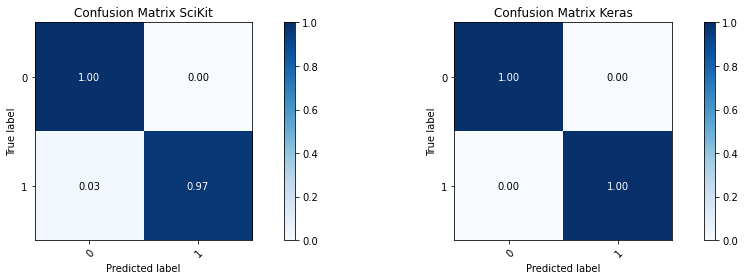

In [65]:
confMatrix = plotModule.ConfusionMatrix()
fig = plt.figure(figsize=(15, 4), facecolor='w')

confMatrix.plot(cm=confusion_matrix(y_test, y_pred),
                classes=classes['default'].unique(),
                title='Confusion Matrix SciKit',
                fig=fig,
                subplot_index=1)

confMatrix.plot(cm=confusion_matrix(y_test, y_pred_keras),
                classes=classes['default'].unique(),
                title='Confusion Matrix Keras',
                fig=fig,
                subplot_index=2)